# 거래소 개별종목 일자별 시세 크롤링

### 일자별 시세
[링크](http://marketdata.krx.co.kr/mdi#document=040204)

주식 - 종목정보 - 일자별 시세 - CSV 선택

### 종목 코드

* 거래소 단축코드 6 자리 : A035420 (네이버)
* ISIN 코드 12 자리 : KR7035420009

http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx 에서 사용되는 항목

![img](./images/04-2-1.jpg)

### 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
from datetime import datetime, timedelta

In [2]:
def get_daily_price(code, fromdate=None, todate=None):
    if todate == None:
        todate = datetime.today().strftime('%Y%m%d')   # 오늘 날짜

    if fromdate == None:
        fromdate = (datetime.today() - timedelta(days=30)).strftime('%Y%m%d')   # 30일 이전 날짜

    # STEP 01: Generate OTP
    gen_otp_url = "http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx"
    gen_otp_data = {
        'name':'fileDown',
        'filetype':'csv',
        'url':'MKD/04/0402/04020100/mkd04020100t3_02',
        'isu_cd':code,
        'fromdate':fromdate,
        'todate':todate,
    }
    
    r = requests.post(gen_otp_url, gen_otp_data)
    code = r.content  # 리턴받은 값을 아래 요청의 입력으로 사용.
    
    # STEP 02: download
    down_url = 'http://file.krx.co.kr/download.jspx'
    down_data = {
        'code': code,
    }
    
    r = requests.post(down_url, down_data)
    r.encoding = "utf-8-sig"
    df = pd.read_csv(BytesIO(r.content), header=0, thousands=',')
    return df

In [3]:
df = get_daily_price('KR7035420009')
df.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2017/04/05,843000,-7000,99674,84156754608,857000,859000,835000,27787538,32962679
1,2017/04/04,850000,-23000,59594,51010262154,868000,869000,846000,28018277,32962679
2,2017/04/03,873000,18000,54884,47808834000,855000,878000,843000,28776419,32962679
3,2017/03/31,855000,-6000,50026,42957075000,861000,870000,854000,28183091,32962679
4,2017/03/30,861000,-3000,57075,49337280851,865000,874000,856000,28380867,32962679


In [4]:
df = df.loc[:, ['년/월/일','시가','고가','저가','종가','거래량(주)']]
df.columns = ['date','open','hign','low','close','volume']
df.set_index('date', inplace=True)
df.head()

,open,hign,low,close,volume
date,,,,,
2017/04/05,857000,859000,835000,843000,99674
2017/04/04,868000,869000,846000,850000,59594
2017/04/03,855000,878000,843000,873000,54884
2017/03/31,861000,870000,854000,855000,50026
2017/03/30,865000,874000,856000,861000,57075


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# plot의 한글 표시 설정

In [7]:
plt.rcParams["font.family"]

['sans-serif']

In [8]:
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 10

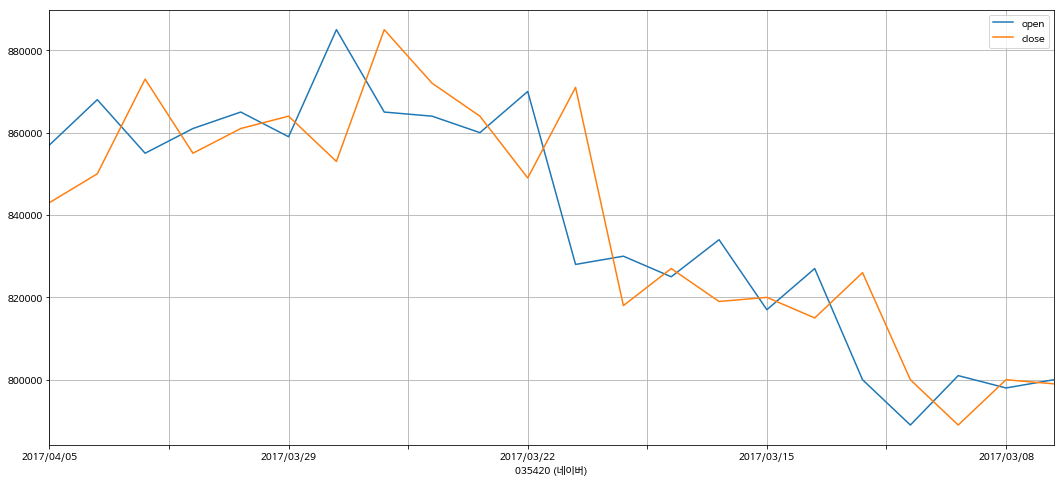

In [9]:
df['open'].plot(figsize=(18,8))
df['close'].plot(grid=True)
plt.legend()
plt.xlabel('035420 (네이버)')